<a href="https://colab.research.google.com/github/ElaYJ/Study_Deep_Learning/blob/main/Framework/1_TensorFlow/01_Constants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constants

In [2]:
import numpy as np
import tensorflow as tf

print("TensorFlow version", tf.__version__)

TensorFlow version 2.13.0


## Tensor

- Deeplearning framework는 기본적으로 Tensor를 다루는 도구다.
    - [Tensor](https://www.google.com/search?q=Tensor&newwindow=1&sxsrf=AOaemvLxCRvi46j5dRtWwY8K6ssvkpF48A:1641452781782&source=lnms&tbm=isch&sa=X&ved=2ahUKEwin2eSPyJz1AhXNdd4KHWzUAd8Q_AUoAXoECAIQAw&biw=1440&bih=820&dpr=2)


- Tensor를 다룰 때 가장 중요한 것!

  ${\rightarrow} \ $ **SHAPE !!!**
  
 (해보면 알겠지만, 제일 에러 많이 나는 이유, 제일 헷갈리는 것, 개발할 때 우리가 이론을 알아야 하는 이유, 함수들의 설정값을 확인해야하는 이유)



## Tensor 생성

우리가 생성하는 것은 `tf.Tensor` 데이터!

**항상 체크 해야 할 것 !**
 - shape
 - dtype (데이터 타입이 같아야 연산이 가능합니다.)

## Constant (상수)

- 기존 python의 list, tuple, array(numpy)로 Tensor 상수 만들기

- **```tf.constant()```**

    - list -> Tensor
    - tuple -> Tensor
    - Array -> Tensor

In [2]:
li_ten = tf.constant([1, 2, 3])
li_ten

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [3]:
li_ten_f = tf.constant([1., 2., 3.])
li_ten_f

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [4]:
tu_ten = tf.constant(((1, 2, 3), (1, 2, 3)), name="sample")
tu_ten

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [5]:
arr = np.array([1., 2., 3.])#, dtype='float64')
arr_ten = tf.constant(arr)
arr_ten

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 2., 3.])>

#### 잠깐 옆으로 새서...
* double precision : 64bits
* single precision : 32bits
* half precision   : 16bits

### Numpy array 추출

- tf.Tensor에는 `numpy()`라는 메서드가 있다.

In [6]:
arr_ten.numpy(), type(arr_ten.numpy())

(array([1., 2., 3.]), numpy.ndarray)

In [7]:
li_ten.numpy(), type(li_ten.numpy())

(array([1, 2, 3], dtype=int32), numpy.ndarray)

In [9]:
not_a_matrix = [[1,2,3], [4, 5], [6, 7, 8]]
# tf.constant(not_a_matrix)
#--> ValueError: Can't convert non-rectangular Python sequence to Tensor.

### shape, dtype 항상 체크!!

- shape이나 data-type이 일치하지 않으면 연산 불가능~!

- rank 수(ndim)가 맞지 않아도 연산이 불가능하다.

In [10]:
li_ten.shape, tu_ten.shape, arr_ten.shape

(TensorShape([3]), TensorShape([2, 3]), TensorShape([3]))

In [ ]:
arr_ten.dtype, li_ten.dtype

(tf.float64, tf.int32)

In [15]:
# 1번 케이스
# (1x3) · (2x3) : metrix가 내적이 불가능한 형태
# InvalidArgumentError: In[0] and In[1] has different ndims: [3] vs. [2,3]

# tf.matmul(li_ten, tu_ten)

In [14]:
# 2번 케이스

# tf.matmul(tu_ten, li_ten)

In [12]:
# 차원수 확인 : ndim

print(li_ten.ndim)
print(tu_ten.ndim)

1
2


In [ ]:
# 3번 케이스
# float63 x int32 : dtype이 다르면 연산이 불가능하다.

# arr_ten * li_ten

### 자료형 형변환

- 데이터 타입 컨트롤하는 방법

- `tf.cast`

</br>

<img src="https://github.com/ElaYJ/supplement/assets/153154981/f71e8378-59b8-425a-935f-3670dd1fc92c" width="57%">

In [16]:
# 미리 지정해주거나
tensor = tf.constant([1, 2, 3], dtype=tf.float32)
tensor

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [17]:
# tf.cast를 사용. 다만, 많은 경우 미리 데이터타입을 정리해둘 수 있다.
tf.cast(tensor, dtype=tf.int16)

<tf.Tensor: shape=(3,), dtype=int16, numpy=array([1, 2, 3], dtype=int16)>

#### 간단 퀴즈

아래 코드를 에러 없이 실행 하시오.

In [18]:
arr_ten, li_ten

(<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 2., 3.])>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>)

In [ ]:
arr_ten * li_ten

InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a double tensor but is a int32 tensor [Op:Mul]

In [19]:
# 해설

arr_ten * tf.cast(li_ten, tf.float64)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1., 4., 9.])>

### 특정 값의 Tensor 생성

- tf에서 사용되는 초기화 함수

	<img src="https://github.com/ElaYJ/supplement/assets/153154981/659162c9-5f1f-42c1-a979-6a83133fe42d" width="57%">



 - `tf.ones`
 
 - `tf.zeros`
 
 - `tf.range`

In [20]:
tf.ones(1)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [31]:
tf.ones(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [21]:
tf.zeros((2, 5), dtype="int32")

<tf.Tensor: shape=(2, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [22]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [23]:
tf.range(1, 11)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)>

####  간단 퀴즈

**n 을 입력하면 첫항이 1이고 공비가 2인 등비수열을 생성하는 함수를 만드시오**
(이 때 결과값은 tf.Tensor 데이터이고, 데이터 타입은 tf.int32)

$$
n = 10 \ 일 때 \\ \\
(1,~2,~4,~8,~16,~32,~64,~128,~256,~512)
$$

In [26]:
def geometric_sequence(n):
    result = [1,]
    a=1
    for i in range(n-1):
        a *= 2
        result.append(a)
    return tf.constant(result, dtype='int32')

In [27]:
print(geometric_sequence(10))

tf.Tensor([  1   2   4   8  16  32  64 128 256 512], shape=(10,), dtype=int32)


-----

In [28]:
def geometric_sequence(n):
    r = tf.range(n, dtype='int32')
    s = tf.ones(n, dtype=tf.int32) * 2
    return s**r

In [29]:
tf.range(10, dtype='int32')

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [30]:
tf.ones(10, dtype=tf.int32)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)>

In [32]:
tf.ones(10, dtype=tf.int32) * 2

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)>

In [33]:
print(geometric_sequence(10))

tf.Tensor([  1   2   4   8  16  32  64 128 256 512], shape=(10,), dtype=int32)


## Random Value(난수)

- 무작위 값을 생성할 때 필요.
- Noise를 재현 한다거나, test를 한다거나 할 때 많이 사용됨
- 데이터 타입은 상수형태로 반환됨<br></br>

**`tf.random`** 에 구현 되어 있음.

  - `tf.random.normal`
      - Gaussian Normal Distribution
      
  - `tf.random.uniform`
      - Uniform Distribution
      
> 이렇게나 많습니다! [LINK](https://www.tensorflow.org/api_docs/python/tf/random)

In [34]:
shape = (3, 3)

In [35]:
tf.random.normal(shape)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.34185266,  0.27840805,  0.05853431],
       [-2.2830732 , -0.20140494, -0.41426593],
       [-1.2484925 , -0.88472223,  1.8271574 ]], dtype=float32)>

In [36]:
tf.random.normal(shape, mean=100, stddev=10)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[101.03205 ,  84.10386 ,  97.208855],
       [ 97.99629 , 118.16855 ,  78.99282 ],
       [ 92.93791 ,  83.00777 ,  76.499825]], dtype=float32)>

- tf.random.uniform
    - TensorFlow에서 Uniform Distribution

In [37]:
tf.random.uniform(shape)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.27665615, 0.3536346 , 0.7579843 ],
       [0.34038734, 0.6704452 , 0.5172585 ],
       [0.88530135, 0.92387855, 0.7281867 ]], dtype=float32)>

In [3]:
# === Normal normal distribution ===
x_normal = tf.random.normal(shape=(1, 50000), mean=0, stddev=1).numpy()

# === Uniform distribution ===
minval, maxval = -2, 2
x_uniform = tf.random.uniform((1, 50000), minval, maxval).numpy()

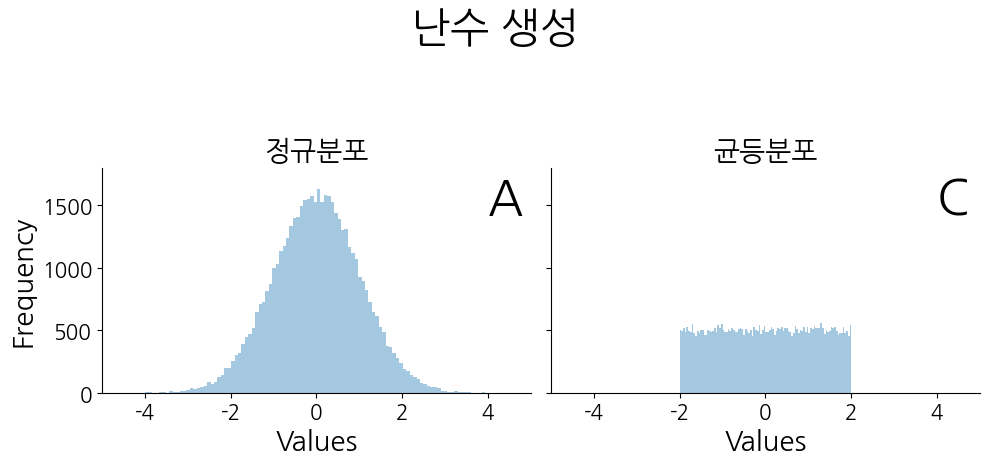

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# matplotlib 설정 부분
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='both', which='major', labelsize=15)
    
def get_axis_limits(ax, scale=.8):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*scale

f,axarr = plt.subplots(1,2,figsize=[10,4],sharey=True)
titles = ['정규분포','균등분포']

for i,x in enumerate([x_normal,x_uniform]):
    ax = axarr[i]
    ax.hist(x[0], bins=100, alpha=0.4)
    ax.set_title(titles[i], fontsize=20)
    ax.set_xlabel('Values', fontsize=20)
    ax.set_xlim([-5, 5])
    ax.set_ylim([0, 1800])
    
    simpleaxis(ax)
    
axarr[0].set_ylabel('Frequency', fontsize=20)
plt.suptitle('난수 생성', fontsize=30, y=1.15)

for ax,letter in zip(axarr,['A','C']):
    simpleaxis(ax)
    ax.annotate(letter, xy=get_axis_limits(ax),fontsize=35)
    
plt.tight_layout()
plt.show()

### **Random seed 관리 하기!!!**

- Random value로 보통 가중치를 초기화
- 이외에도 학습과정에서 Random value가 많이 사용됨.
- 이를 관리 안해주면, 자신이 했던 작업이 동일하게 복구 또는 재현이 안됨!!!

- **`tf.random.set_seed({seed_number})`**

    **=> 항상 Random seed를 고정해두고 개발 한다!!!**
   
    (주의 할 점은 해당 개발물에 사용되는 난수가 모두 TensorFlow에서 생성된것이 아닐 수 있다는 것이다.)

In [38]:
seed = 7777

In [39]:
tf.random.set_seed(seed)
a = tf.random.uniform([1])
b = tf.random.uniform([1])
print(a, b, sep="\n")

tf.Tensor([0.959749], shape=(1,), dtype=float32)
tf.Tensor([0.8677443], shape=(1,), dtype=float32)


In [40]:
a = tf.random.uniform([1])
b = tf.random.uniform([1])
print(a, b, sep="\n")

tf.Tensor([0.22878075], shape=(1,), dtype=float32)
tf.Tensor([0.87772965], shape=(1,), dtype=float32)


In [41]:
tf.random.set_seed(seed)
a = tf.random.uniform([1])
b = tf.random.uniform([1])
print(a, b, sep="\n")

tf.Tensor([0.959749], shape=(1,), dtype=float32)
tf.Tensor([0.8677443], shape=(1,), dtype=float32)
